# LSTM (Long Short-Term Memory layer)

this layer is a variant of RNN that is easier to train. It has a memory cell that can maintain information in memory for long periods of time. A set of gates is used to control when information enters the memory, when it's output, and when it's forgotten. This architecture lets them learn longer-term dependencies. It has been proven to be extremely effective in many sequence problems. 

In [9]:
from keras.layers import LSTM
import tensorflow as tf
import numpy as np
from utils import *

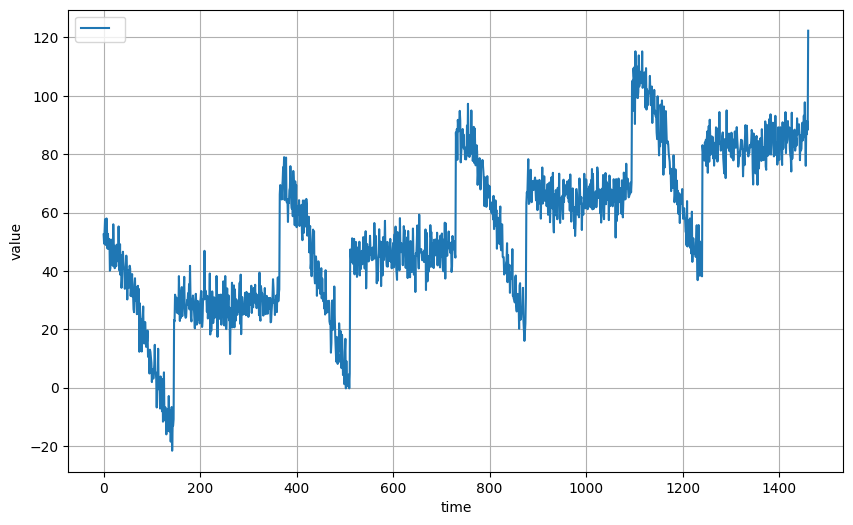

In [10]:
# Parameters
time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

# Update with noise
series += noise(time, noise_level, seed=42)

# Plot the results
plot_series(time, series)

In [11]:
# Split the data
split_time = 1000

time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

train_dataset = generate_windowed_dataset(series, window_size=20, batch_size=32, shuffle_buffer=1000)

In [12]:
tf.keras.backend.clear_session() # to reset internal variables inside the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]))
model.add(tf.keras.layers.Bidirectional(LSTM(32)))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Lambda(lambda x: x * 100.0))

model.compile(loss=tf.keras.losses.Huber(), optimizer="adam", metrics=["mae"])
model.fit(train_dataset, epochs=100)

Epoch 1/100
46/46 [==============================] - 3s 5ms/step - loss: 12.2021 - mae: 12.6909
Epoch 2/100
46/46 [==============================] - 0s 5ms/step - loss: 7.0894 - mae: 7.5766
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 5.9858 - mae: 6.4664
Epoch 4/100
46/46 [==============================] - 0s 5ms/step - loss: 5.3433 - mae: 5.8236
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 5.2809 - mae: 5.7601
Epoch 6/100
46/46 [==============================] - 0s 5ms/step - loss: 5.1425 - mae: 5.6208
Epoch 7/100
46/46 [==============================] - 0s 5ms/step - loss: 5.0373 - mae: 5.5156
Epoch 8/100
46/46 [==============================] - 0s 5ms/step - loss: 5.1832 - mae: 5.6609
Epoch 9/100
46/46 [==============================] - 0s 4ms/step - loss: 5.7719 - mae: 6.2552
Epoch 10/100
46/46 [==============================] - 0s 5ms/step - loss: 4.9560 - mae: 5.4354
Epoch 11/100
46/46 [==============================] - 0s 

15/15 [==============================] - 1s 3ms/step


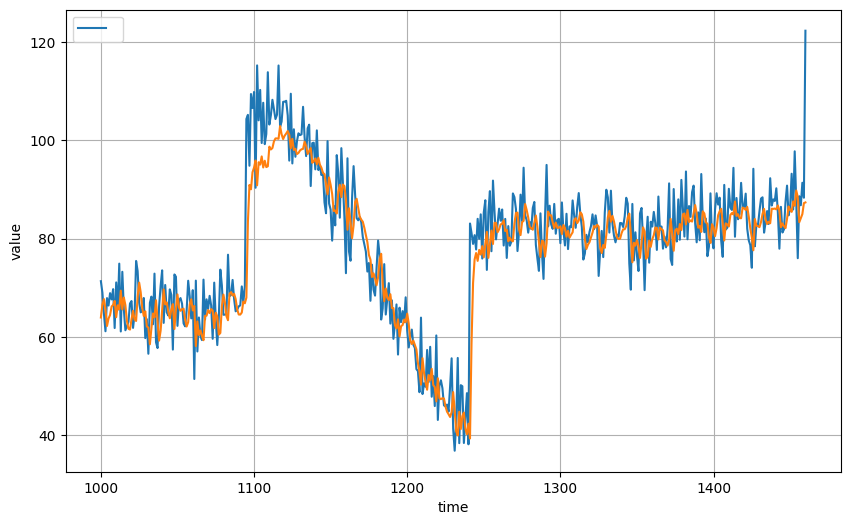

In [13]:
predict_dataset = tf.data.Dataset.from_tensor_slices(series[980: -1])
predict_dataset = predict_dataset.window(20, shift=1, drop_remainder=True)
predict_dataset = predict_dataset.flat_map(lambda window: window.batch(20))
predict_dataset = predict_dataset.batch(32).prefetch(1)
forecast = model.predict(predict_dataset)

plot_series(time_valid, (x_valid, forecast))

In [19]:
tf.keras.backend.clear_session() # to reset internal variables inside the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]))
model.add(tf.keras.layers.Bidirectional(LSTM(32, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(LSTM(32)))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Lambda(lambda x: x * 100.0))

model.compile(loss=tf.keras.losses.Huber(), optimizer="adam", metrics=["mae"])
model.fit(train_dataset, epochs=100)

Epoch 1/100
46/46 [==============================] - 4s 8ms/step - loss: 8.8566 - mae: 9.3422
Epoch 2/100
46/46 [==============================] - 0s 8ms/step - loss: 5.5794 - mae: 6.0577
Epoch 3/100
46/46 [==============================] - 0s 8ms/step - loss: 7.4157 - mae: 7.9015
Epoch 4/100
46/46 [==============================] - 0s 8ms/step - loss: 5.0870 - mae: 5.5646
Epoch 5/100
46/46 [==============================] - 0s 8ms/step - loss: 5.4448 - mae: 5.9223
Epoch 6/100
46/46 [==============================] - 0s 8ms/step - loss: 5.5038 - mae: 5.9847
Epoch 7/100
46/46 [==============================] - 0s 9ms/step - loss: 5.0046 - mae: 5.4834
Epoch 8/100
46/46 [==============================] - 0s 8ms/step - loss: 4.6787 - mae: 5.1585
Epoch 9/100
46/46 [==============================] - 0s 8ms/step - loss: 4.9669 - mae: 5.4506
Epoch 10/100
46/46 [==============================] - 0s 8ms/step - loss: 4.9376 - mae: 5.4143
Epoch 11/100
46/46 [==============================] - 0s 8m

15/15 [==============================] - 0s 6ms/step


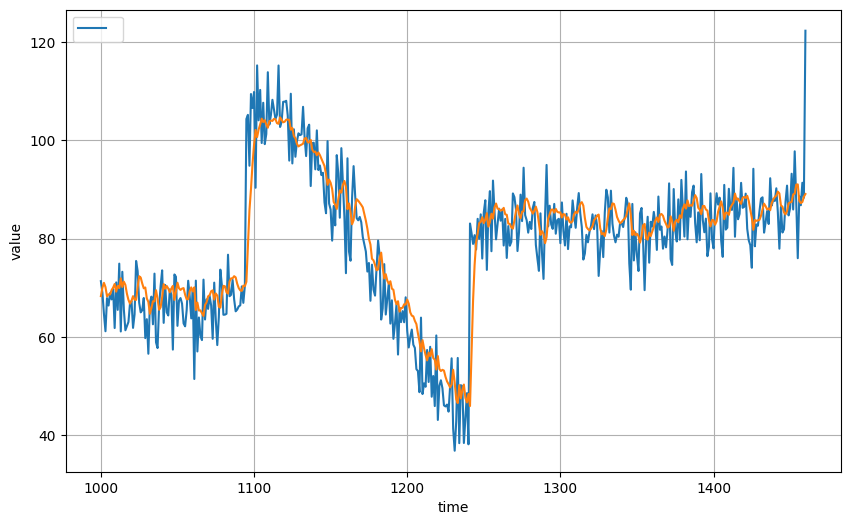

In [18]:
forecast = model.predict(predict_dataset)
plot_series(time_valid, (x_valid, forecast))

In [16]:
tf.keras.backend.clear_session() # to reset internal variables inside the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]))
model.add(tf.keras.layers.Bidirectional(LSTM(32, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(LSTM(32, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(LSTM(32)))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Lambda(lambda x: x * 100.0))

model.compile(loss=tf.keras.losses.Huber(), optimizer="adam", metrics=["mae"])
model.fit(train_dataset, epochs=100)

Epoch 1/100
46/46 [==============================] - 8s 14ms/step - loss: 15.3693 - mae: 15.8593
Epoch 2/100
46/46 [==============================] - 1s 15ms/step - loss: 6.1553 - mae: 6.6346
Epoch 3/100
46/46 [==============================] - 1s 15ms/step - loss: 5.3928 - mae: 5.8755
Epoch 4/100
46/46 [==============================] - 1s 14ms/step - loss: 5.2198 - mae: 5.6971
Epoch 5/100
46/46 [==============================] - 1s 14ms/step - loss: 5.3264 - mae: 5.8062
Epoch 6/100
46/46 [==============================] - 1s 15ms/step - loss: 5.6375 - mae: 6.1194
Epoch 7/100
46/46 [==============================] - 1s 15ms/step - loss: 5.4984 - mae: 5.9799
Epoch 8/100
46/46 [==============================] - 1s 15ms/step - loss: 5.1269 - mae: 5.6072
Epoch 9/100
46/46 [==============================] - 1s 14ms/step - loss: 4.8826 - mae: 5.3618
Epoch 10/100
46/46 [==============================] - 1s 15ms/step - loss: 5.2760 - mae: 5.7556
Epoch 11/100
46/46 [===========================

15/15 [==============================] - 2s 6ms/step


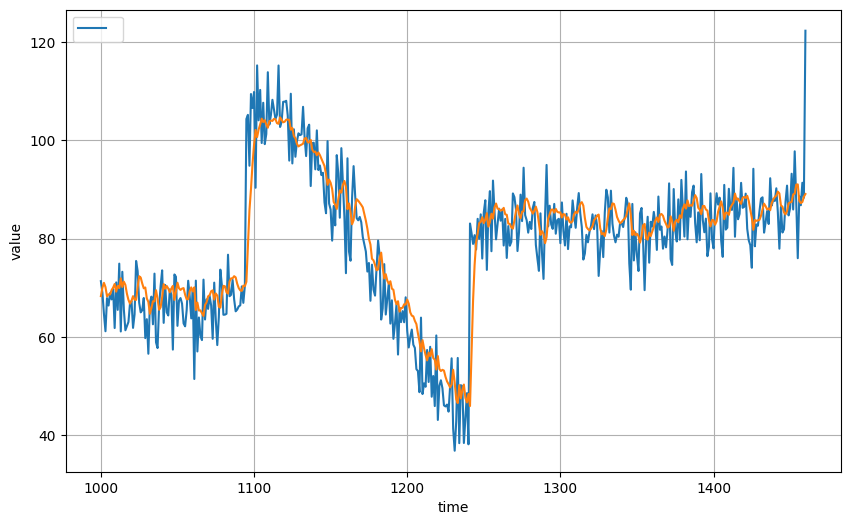

In [17]:
forecast = model.predict(predict_dataset)
plot_series(time_valid, (x_valid, forecast))